In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 데이터 가져오기

In [2]:
df = pd.read_csv("com_data.csv")
df.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
5,508810,239047,2018,3,528980,5
6,365169,3650711,2016,4,570320,3
7,189562,7119908,2016,1,1276900,6
8,133518,18642904,2018,10,16844840,75
9,190847,2367117,2015,12,2354660,8


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


## 연도별 매출액 확인

<AxesSubplot:xlabel='년도', ylabel='연매출액'>

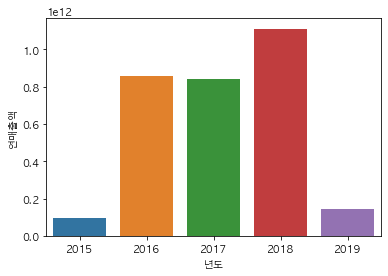

In [3]:
sns.barplot(data=df, x='년도', y='연매출액', ci=None, estimator=sum)

## 회사 별 연매출액 순위 보기

In [4]:
group = df.groupby(df['회사ID']).sum()
group

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
63,135945352752,24216,78,4921538740,12086
95,7883369244,24216,78,2578054120,6492
102,5941271504,16144,68,1390156180,6017
295,670213576,16144,68,618496280,2076
414,236793228,24216,78,931082320,2971
...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33
2437574,214016,2018,5,636740,3
2693684,1428456,12114,57,2628720,18


In [39]:
profit = group.sort_values(by=['연매출액'], ascending=False)
profit.head(50)

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
419945,400950111264,96840,312,40263116800,131735
227415,201953222900,76642,257,32391916020,87340
227414,173560341862,76642,257,33048032220,88314
419977,153075084000,72612,234,14079414180,46279
294649,145796011006,76642,257,3911712480,10278
63,135945352752,24216,78,4921538740,12086
419998,127382131032,72612,234,10894240960,29248
126831,76738090564,76642,257,8652008820,22195
381180,55466949156,76642,257,2423602580,6483


In [46]:
profit_filtered = profit['연매출액'] > 5589816090
len(profit[profit_filtered])

49

In [49]:
top_49 = profit[profit_filtered]
top_49

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
419945,400950111264,96840,312,40263116800,131735
227415,201953222900,76642,257,32391916020,87340
227414,173560341862,76642,257,33048032220,88314
419977,153075084000,72612,234,14079414180,46279
294649,145796011006,76642,257,3911712480,10278
63,135945352752,24216,78,4921538740,12086
419998,127382131032,72612,234,10894240960,29248
126831,76738090564,76642,257,8652008820,22195
381180,55466949156,76642,257,2423602580,6483


## 데이터 기간 확인해보기

In [18]:
df_period = df.sort_values(by=['년도', '월'], ascending=True)
df_period.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
3,386420,4815584,2015,11,3795900,14
93,145900,4753036,2015,11,4153140,25
97,139359,50216484,2015,11,10547240,39
193,135634,13168146,2015,11,10895560,44
327,190720,3680361,2015,11,945900,4
349,137784,13942269,2015,11,11220820,49
485,179050,4134391,2015,11,2480420,11
583,514711,667698,2015,11,998160,8
592,404139,8694049,2015,11,16557740,96
601,228130,17092968,2015,11,9067300,37


In [20]:
value = df.loc[df['년도'] == 2019]
value2019 = value.sort_values(by=['연매출액','월별_연금보험료'], ascending=False)
value2019.head(20)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
71565,419945,10058868796,2019,10,953121400,2871
6086,419945,10058868796,2019,12,952530380,2872
35822,419945,10058868796,2019,11,952045040,2870
89842,419945,10058868796,2019,9,933819300,2779
25614,419945,10058868796,2019,7,928921380,2762
70918,419945,10058868796,2019,8,927833840,2753
88487,419945,10058868796,2019,6,870767520,2757
13109,419945,10058868796,2019,4,870665760,2765
53151,419945,10058868796,2019,5,870631680,2770
60354,419945,10058868796,2019,2,867816240,2745


In [23]:
len(value)

852

In [25]:
value_2015 = df.loc[df['년도'] == 2015]
len(value_2015)

3586

In [26]:
value_2016 = df.loc[df['년도'] == 2016]
len(value_2016)

37685

In [27]:
value_2017 = df.loc[df['년도'] == 2017]
len(value_2017)

17806

In [28]:
value_2018 = df.loc[df['년도'] == 2018]
len(value_2018)

39872

In [29]:
value_2019 = df.loc[df['년도'] == 2019]
len(value_2019)

852